In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\LENOVO\OneDrive\ドキュメント\Projekan, Lomba dll\PORTOFOLIO\Analisis Performa Penjualan Produk Berdasarkan Data Transaksi (AkarDagang)\sales_data(akardagang).csv')
data

,transaction_id,date,customer_id,product_id,product_name,category,price,quantity,total,store_type
0,T100000,2024-03-07,C151,P004,Minyak Goreng,Makanan,15000,2,30000,offline
1,T100001,2024-04-10,C192,P010,Air Mineral 1.5L,Minuman,5000,1,5000,online
2,T100002,2024-06-09,C114,P006,Beras 5kg,Makanan,60000,4,240000,offline
3,T100003,2024-03-19,C171,P008,Teh Celup,Minuman,4000,3,12000,online
4,T100004,2024-02-19,C160,P008,Teh Celup,Minuman,4000,2,8000,online
...,...,...,...,...,...,...,...,...,...,...
995,T100995,2024-01-31,C109,P003,Mie Instan,Makanan,2500,5,12500,online
996,T100996,2024-01-21,C166,P010,Air Mineral 1.5L,Minuman,5000,1,5000,online
997,T100997,2024-05-29,C117,P008,Teh Celup,Minuman,4000,5,20000,offline
998,T100998,2024-06-16,C199,P001,Sabun Mandi,Kebersihan,5000,5,25000,offline


# DATA UNDERSTANDING & PREPARATION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1000 non-null   object
 1   date            1000 non-null   object
 2   customer_id     1000 non-null   object
 3   product_id      1000 non-null   object
 4   product_name    1000 non-null   object
 5   category        1000 non-null   object
 6   price           1000 non-null   int64 
 7   quantity        1000 non-null   int64 
 8   total           1000 non-null   int64 
 9   store_type      1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


In [4]:
data.describe()

,price,quantity,total
count,1000.000000,1000.00000,1000.000000
mean,11415.500000,3.00100,35162.000000
std,15476.842132,1.42233,56170.329017
min,2500.000000,1.00000,2500.000000
25%,4000.000000,2.00000,9000.000000
50%,5000.000000,3.00000,16000.000000
75%,12000.000000,4.00000,32000.000000
max,60000.000000,5.00000,300000.000000


In [5]:
data.shape #(baris, kolom)

(1000, 10)

In [6]:
miss=data.isnull().sum()
miss

transaction_id    0
date              0
customer_id       0
product_id        0
product_name      0
category          0
price             0
quantity          0
total             0
store_type        0
dtype: int64

In [7]:
dup=data.duplicated().sum()
dup

0

In [8]:
data.dtypes

transaction_id    object
date              object
customer_id       object
product_id        object
product_name      object
category          object
price              int64
quantity           int64
total              int64
store_type        object
dtype: object

In [9]:
data['date']=pd.to_datetime(data['date'])
data.dtypes

transaction_id            object
date              datetime64[ns]
customer_id               object
product_id                object
product_name              object
category                  object
price                      int64
quantity                   int64
total                      int64
store_type                object
dtype: object

In [10]:
data['bulan']=data['date'].dt.strftime('%B')
data

,transaction_id,date,customer_id,product_id,product_name,category,price,quantity,total,store_type,bulan
0,T100000,2024-03-07,C151,P004,Minyak Goreng,Makanan,15000,2,30000,offline,March
1,T100001,2024-04-10,C192,P010,Air Mineral 1.5L,Minuman,5000,1,5000,online,April
2,T100002,2024-06-09,C114,P006,Beras 5kg,Makanan,60000,4,240000,offline,June
3,T100003,2024-03-19,C171,P008,Teh Celup,Minuman,4000,3,12000,online,March
4,T100004,2024-02-19,C160,P008,Teh Celup,Minuman,4000,2,8000,online,February
...,...,...,...,...,...,...,...,...,...,...,...
995,T100995,2024-01-31,C109,P003,Mie Instan,Makanan,2500,5,12500,online,January
996,T100996,2024-01-21,C166,P010,Air Mineral 1.5L,Minuman,5000,1,5000,online,January
997,T100997,2024-05-29,C117,P008,Teh Celup,Minuman,4000,5,20000,offline,May
998,T100998,2024-06-16,C199,P001,Sabun Mandi,Kebersihan,5000,5,25000,offline,June


# EXPLORATORY DATA ANALYSIS (EDA)

## Distribusi data

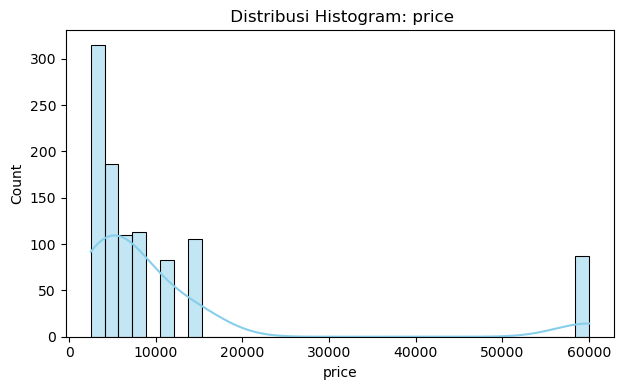

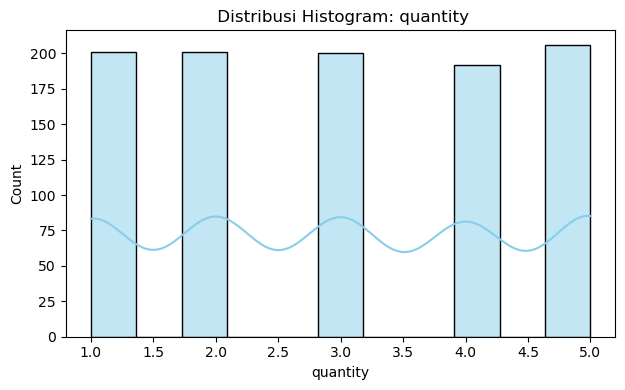

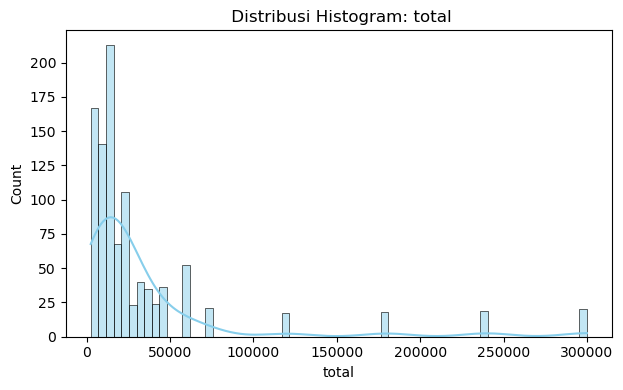

In [11]:
num_cols=data.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(12,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[col],kde=True, color='skyblue')
    plt.title(f' Distribusi Histogram: {col}')
    
    plt.tight_layout()
    plt.show()
    

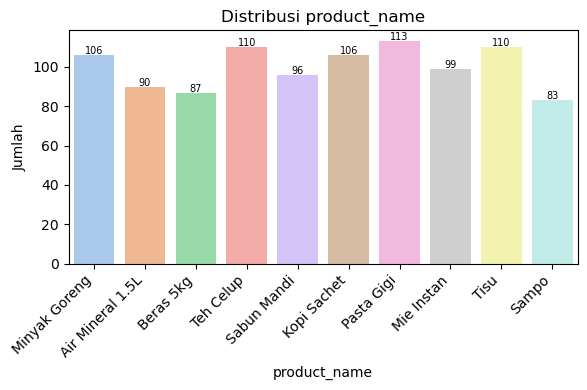

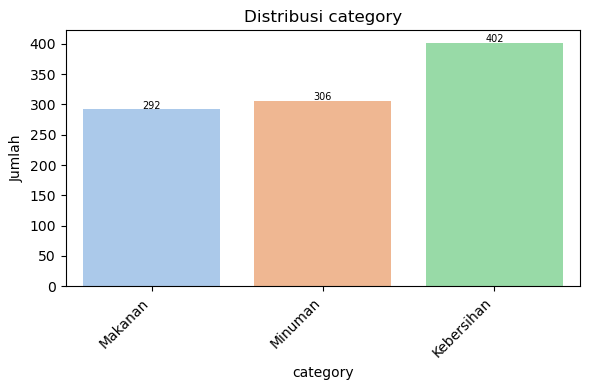

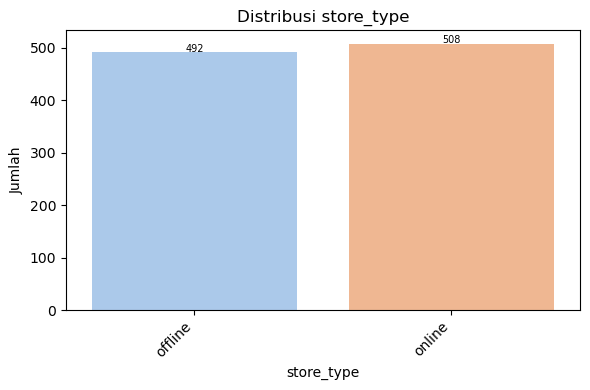

In [12]:
cat_cols = ['product_name', 'category', 'store_type']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', fontsize=7)

    plt.tight_layout()
    plt.show()

# TASK

### 1. Top 5 Produk Terlaris

In [13]:
top_produk=data.groupby('product_name')['quantity'].sum()
top_produk=top_produk.sort_values(ascending=False)
top5=pd.DataFrame(top_produk.head(5))

print(f'Top 5 Produk Terlaris :')
top5

Top 5 Produk Terlaris :


,quantity
product_name,
Pasta Gigi,342
Teh Celup,335
Minyak Goreng,322
Tisu,321
Sabun Mandi,305


### 2. Penjualan per Kategori

In [14]:
penjualan= pd.DataFrame(data.groupby('category')['total'].sum().sort_values(ascending=False))
print (f'Penjualan per Kategori :')
penjualan

Penjualan per Kategori :


,total
category,
Makanan,22195000
Kebersihan,9436000
Minuman,3531000


### 3. Tren Penjualan Bulanan

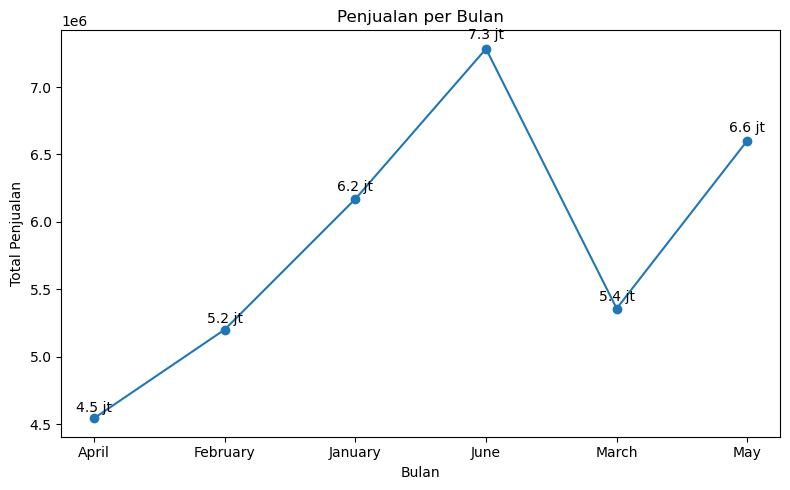

In [15]:
import matplotlib.pyplot as plt

penjualan = data.groupby('bulan')['total'].sum()

ax = penjualan.plot(kind='line', marker='o', figsize=(8,5), title='Penjualan per Bulan')
plt.ylabel('Total Penjualan')
plt.xlabel('Bulan')

for i, (x, y) in enumerate(zip(penjualan.index, penjualan.values)):
    ax.text(i, y + y*0.01, f'{y/1e6:.1f} jt', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


### 4. Perbandingan Penjualan Online VS Offline

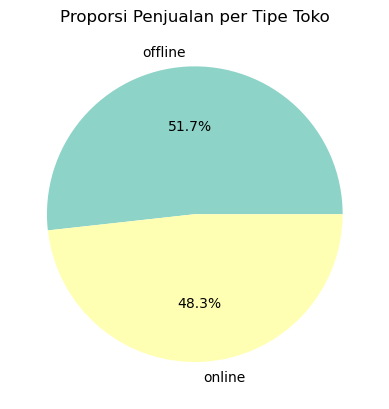

In [16]:
penjualan_On_Off= data.groupby('store_type')['total'].sum().plot(
    kind='pie',
    autopct=lambda pct: f'{pct:.1f}%',
    colors=plt.cm.Set3.colors,  # warna enak dilihat
    ylabel='',
    title='Proporsi Penjualan per Tipe Toko'
)


### 5. Transaksi per Pelanggan

Top 5 Pelanggan dengan Transaksi Terbanyak : 


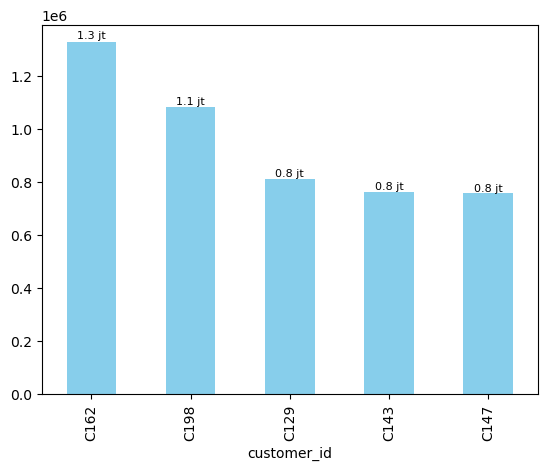

In [17]:
transaksi=data.groupby('customer_id')['total'].sum().sort_values(ascending=False).head(5)
print('Top 5 Pelanggan dengan Transaksi Terbanyak : ')
ax= transaksi.plot(kind='bar', color='skyblue')

for i, (x, y) in enumerate(zip(transaksi.index, transaksi.values)):
    ax.text(i, y + y*0.01, f'{y/1e6:.1f} jt', ha='center', fontsize=8)

# INSIGHT

Pelanggan cenderung memilih produk dengan harga di bawah Rp50.000, yang menunjukkan preferensi terhadap barang dengan harga terjangkau. Strategi penawaran harga rendah, seperti promo diskon ringan atau paket hemat, dapat menjadi daya tarik utama untuk meningkatkan volume penjualan.

Distribusi kuantitas menunjukkan bahwa produk yang terjual memiliki variasi pembelian antara 1 hingga 5 unit. Pola ini mengindikasikan perilaku belanja yang cukup seimbang, sehingga promosi seperti bundling atau diskon untuk pembelian kelipatan dapat menjadi strategi yang efektif.

Sebagian besar pelanggan bertransaksi dengan total pembelanjaan di bawah Rp50.000, meskipun terdapat pula beberapa transaksi bernilai lebih tinggi. Hal ini menunjukkan bahwa pelanggan cenderung menyesuaikan pembelian dengan kebutuhan. Strategi seperti pemberian potongan harga untuk transaksi di atas Rp100.000 atau hadiah gratis dapat mendorong pelanggan untuk meningkatkan jumlah pembelian.

Pasta gigi, Teh celup, Minyak goreng, Tisu, dan sabun mandi menjadi top 5 produk yang banyak dibeli oleh pelanggan. Hal tersebut menunjukkan bahwa pelanggan banyak melakukan pembelian pada kategori kebutuhan pokok, sehingga adanya promosi untuk produk tersebut dapat peningkatkan performa penjualan lebih lanjut.

Kategori Makanan tercatat sebagai kategori paling sering dibeli oleh pelanggan. Temuan ini menegaskan pentingnya fokus pada manajemen stok, penempatan produk, dan promosi khusus untuk kategori ini agar perusahaan dapat mempertahankan performa penjualannya.

Penjualan meningkat tajam di bulan Juni yaitu dengan total transaksi sebesar 7.3 juta. Salah satu kemungkinan penyebabnya adalah adanya momen liburan sekolah atau persiapan hari raya seperti Iduladha, yang biasanya jatuh di sekitar bulan tersebut. Peningkatan ini juga bisa dipicu oleh promosi pertengahan tahun (mid-year sale), serta peningkatan belanja keluarga menjelang liburan.

Toko offline tercatat sebagai channel penjualan yang paling diminati oleh pelanggan. Hal ini kemungkinan disebabkan oleh kemudahan dalam melihat dan memilih produk secara langsung. Untuk memaksimalkan potensi ini, strategi seperti peningkatan ketersediaan stok serta penawaran diskon khusus di toko fisik dapat diterapkan guna mendorong daya beli pelanggan.

Mempertahankan pelanggan dengan tingkat transaksi tinggi merupakan strategi penting untuk menjaga stabilitas dan pertumbuhan pasar. Pelanggan yang menunjukkan konsistensi dalam melakukan pembelian dapat diberikan apresiasi berupa diskon, reward, atau program loyalitas sebagai bentuk penghargaan dan upaya untuk meningkatkan retensi mereka terhadap perusahaan.